First we must import all the libraries. Numoy is used for calculations, pandas for dataframe manipulation, matplotlib for plots, seaborn for advanced plots and sklearn to builthe model without doing it from scratch.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Next we read the data frame and show the first 5 rows so we can see the columns.

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In this cell we used describe and info functions from the pandas library to find out statisitcal info about the dataset.

In [3]:
wine.info()

wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now we copy the Wine dataset to another dataframe called data so we can manipulate the information without altering the original dataset.

In [4]:
data = wine.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Here we converted the wine quality from a range of 0 to 10 to a score of good or bad, where good is 1 and bad is 0. This will make it simpler to calculate if a wine is good or bad and make Precision, F1 and Recall values easier to find.

In [5]:
for i in np.arange(len(data)):
    if data['quality'][i] >= 6:
        data['quality'][i] = 1
    else:
        data['quality'][i] = 0
        
data.head()

<ipython-input-5-cf964fa75997>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'][i] = 0
<ipython-input-5-cf964fa75997>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'][i] = 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Here we changed all the 11 features to standard units and appended the new columns back to the dataframe data. Using standard units makes calculations easier as all the featuers are in the same scale. This is called featuer scaling.

In [6]:
data['fixed acidity (standard units)'] = (data['fixed acidity'] - data['fixed acidity'].mean())/data['fixed acidity'].std()
data['volatile acidity (standard units)'] = (data['volatile acidity'] - data['volatile acidity'].mean())/data['volatile acidity'].std()
data['citric acid (standard units)'] = (data['citric acid'] - data['citric acid'].mean())/data['citric acid'].std()
data['residual sugar (standard units)'] = (data['residual sugar'] - data['residual sugar'].mean())/data['residual sugar'].std()
data['chlorides (standard units)'] = (data['chlorides'] - data['chlorides'].mean())/data['chlorides'].std()
data['free sulfur dioxide (standard units)'] = (data['free sulfur dioxide'] - data['free sulfur dioxide'].mean())/data['free sulfur dioxide'].std()
data['total sulfur dioxide (standard units)'] = (data['total sulfur dioxide'] - data['total sulfur dioxide'].mean())/data['total sulfur dioxide'].std()
data['density (standard units)'] = (data['density'] - data['density'].mean())/data['density'].std()
data['pH (standard units)'] = (data['pH'] - data['pH'].mean())/data['pH'].std()
data['sulphates (standard units)'] = (data['sulphates'] - data['sulphates'].mean())/data['sulphates'].std()
data['alcohol (standard units)'] = (data['alcohol'] - data['alcohol'].mean())/data['alcohol'].std()

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity (standard units),citric acid (standard units),residual sugar (standard units),chlorides (standard units),free sulfur dioxide (standard units),total sulfur dioxide (standard units),density (standard units),pH (standard units),sulphates (standard units),alcohol (standard units)
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


Now we shuffle the rows of our data so we can randomly select our training and test sets. We will use these sets to build our model and then compare their results to see if our model was accurate.

In [7]:
random = data.sample(1599, replace = False)
training_set = random.iloc[0:1065, :]
test_set = random.iloc[1065:, :]

print(len(training_set))
print(len(test_set))


1065
534


Here we split the training and test sets into two parts each. One will containt the features of each set while the other part will contain the value that we are trying to predict. We then reshape the parts that contain the features into 2D arrays, because if we don't they will stay 1D arrays and can't be used in the matrix multiplication that will be done later on.

In [8]:
x_train = training_set.iloc[:, 12:].values
y_train = training_set.iloc[:, 11].values
y_train = np.reshape(y_train, (len(y_train), 1))

x_test = test_set.iloc[:, 12:].values
y_test = test_set.iloc[:, 11].values
y_test = np.reshape(y_test, (len(y_test), 1))

print("x_train_Shape:", np.shape(x_train))
print("y_train_Shape:", np.shape(y_train))

print("x_test_Shape:", np.shape(x_test))
print("y_test_Shape:", np.shape(y_test))

x_train_Shape: (1065, 11)
y_train_Shape: (1065, 1)
x_test_Shape: (534, 11)
y_test_Shape: (534, 1)


We need to find the transpose of the x_train and x_test sets so they can be multiplied with the transpose of theta later on. If we don't matrix multiplication can't occur as the number of columns of theta and the number of rows of x train and x test won't match, which is needed for multiplication. After finding the transpose, we need to put a row of ones above the arrays using the vstack function. We do this to vectorize the arrays for multiplication.

In [9]:
x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
print("x_train_Aug:", np.shape(x_train_Aug))

x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
print("x_test_Aug:", np.shape(x_test_Aug))

x_train_Aug: (12, 1065)
x_test_Aug: (12, 534)


Now we form theta, which will be an array of zeros with 12 rows and 1 column. We will alter transpose this and multiply it by x_train_Aug and x_test_Aug arrays we got above.

In [10]:
theta = np.zeros((12,1))
print("theta:", np.shape(theta))

theta: (12, 1)


After we find theta, we multiply it with x_train_Aug from our training set to build our model. This is stored in the variable z which is than inserted in the sigmoid function 1/(1+e^(-z)). That will give us our hypothesis function p. We use this hypothesis function for gradent descent, which is an optimization algorithim used to find the lowest cost function. We do this 10,000 times so we can find the lowest cost function possible. We chose a learning rate of 0.3 as it showed a plateau and the lowest cost function value on the cost func vs no of iterations graph that will be shown later. We also update the theta values at the end as it was an array of zeros.

In [11]:
no_of_iter = np.arange(1, 10001)
alpha = 0.01
m_train = len(x_train)
m_test = len(x_test)

costfunc = []

for i in no_of_iter:
    Z = np.transpose(theta)@x_train_Aug
    p = 1/(1+np.exp(-Z))
    ft = ((np.log10(1/(1+np.exp(-Z))))@y_train)[0,0]  
    st = ((np.log10(1-(1/(1+np.exp(-Z)))))@(1-y_train))[0,0]
    cf = (1/m_train)*(-ft-st) 
    costfunc.append(cf)
    delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(p)-y_train)) 
    theta = theta - (alpha*delthetaj) 
    
print(len(costfunc))
print(theta)

10000
[[ 0.25445532]
 [ 0.15142767]
 [-0.49933519]
 [-0.19193039]
 [ 0.10444793]
 [-0.24737248]
 [ 0.24791172]
 [-0.54135816]
 [-0.18739216]
 [-0.09594405]
 [ 0.58588658]
 [ 0.81819691]]


After we got our model in the cell above we test it on the training set. We then compare the values with 0.5, if they are greater it means the quality value is 1 but if the values are less than 0.5 the quality is 0.

In [12]:
y_train_pred = np.zeros((m_train,1))
h_Theta = np.transpose(theta)@x_train_Aug
h_Theta_trans = np.transpose(h_Theta)




for j in range(m_train):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        y_train_pred[j] = [1]
    else: 
        y_train_pred[j] = [0]

We do the same for the test set and find the predicted quality values.

In [13]:
y_test_pred = np.zeros((m_test,1))
h_Theta = np.transpose(theta)@x_test_Aug
h_Theta_trans = np.transpose(h_Theta)


for j in range(m_test):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        y_test_pred[j] = [1]
    else: 
        y_test_pred[j] = [0]

Now we plot the cost function against the number of iterations so we can see that the function reaches a constant value. This means our leanrnin rate alpha was good.

Text(0.5, 1.0, 'Cost function vs. number of iterations')

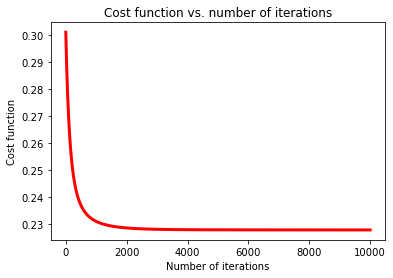

In [14]:
plt.plot(no_of_iter,costfunc,color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Cost function vs. number of iterations")

Now we find the number of the True Positive, True Negative, False Positive and False Negative values for the training set. We use these values to caculate the Accuracy, Precision, Recall and F1 score of our model to evaluate it. These values are calculated using the formulas in the cell below.

In [15]:

count_TP=0
for TP in range(m_train):
    if (y_train_pred[TP] == 1) & (y_train[TP] == 1): 
        count_TP = count_TP+1
print("True_Positives:",count_TP)



count_FP=0
for FP in range(m_train):
    if (y_train_pred[FP] == 1) & (y_train[FP] == 0): 
        count_FP = count_FP+1
print("False Positives:",count_FP)



count_TN=0
for TN in range(m_train):
    if (y_train_pred[TN] == 0) & (y_train[TN] == 0): 
        count_TN = count_TN+1
print("True Negatives:",count_TN)



count_FN=0
for FN in range(m_train):
    if (y_train_pred[FN] == 0) & (y_train[FN] == 1): 
        count_FN = count_FN+1
print("False Negatives:",count_FN)

Accuracy = (count_TP+count_TN)/m_train
print("Accuracy:", Accuracy)

Precision =count_TP/(count_TP+count_FP)
print("Precision:", Precision)

Recall =count_TP/(count_TP+count_FN)
print("Recall:", Recall)

F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("F1_Score:", F1_Score)

True_Positives: 439
False Positives: 139
True Negatives: 349
False Negatives: 138
Accuracy: 0.739906103286385
Precision: 0.759515570934256
Recall: 0.7608318890814558
F1_Score: 0.7601731601731602


We find the same values for the test set so we can compare them with the training set.

In [16]:

count_TP=0
for TP in range(m_test):
    if (y_test_pred[TP] == 1) & (y_test[TP] == 1): 
        count_TP = count_TP+1
print("True Positives:",count_TP)


count_FP=0
for FP in range(m_test):
    if (y_test_pred[FP] == 1) & (y_test[FP] == 0): 
        count_FP = count_FP+1
print("False Positives:",count_FP)


count_TN=0
for TN in range(m_test):
    if (y_test_pred[TN] == 0) & (y_test[TN] == 0): 
        count_TN = count_TN+1
print("True Negatives:",count_TN)



count_FN=0
for FN in range(m_test):
    if (y_test_pred[FN] == 0) & (y_test[FN] == 1): 
        count_FN = count_FN+1
print("False Negatives:",count_FN)

Accuracy = (count_TP+count_TN)/m_test
print("Accuracy:", Accuracy)

Precision =count_TP/(count_TP+count_FP)
print("Precision:", Precision)

Recall =count_TP/(count_TP+count_FN)
print("Recall:", Recall)

F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("F1_Score:", F1_Score)

True Positives: 207
False Positives: 66
True Negatives: 190
False Negatives: 71
Accuracy: 0.7434456928838952
Precision: 0.7582417582417582
Recall: 0.7446043165467626
F1_Score: 0.7513611615245009


As can be seen, our final F1 scores of our models for the training and test sets are very similar. Our F1 scores are around 75 percent, and since the F1 score tests our models accuracy, we can say that our model can predict if a wine is good or bad based on 11 physicochemical features with ~75% accuracy. This value may not be very high, however this model is good enough to at least coorectly determine if most wine samples are good or bad.

Now we use the Sci-kitLearn Library to find a model and test it.

In [17]:
#Reading the .csv file


wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
#Getting the information and basic stattistics from the dataframe


wine.describe()

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
#Assigning the 11 featured columns to a variable named 'x' and assigning the response variable column to a variable 'y'


x = wine.iloc[:, 0:11]
y = wine.iloc[:, 11]

print(x.head())
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    5
1

In [20]:
#Feature scaling the 10 feature columns that are neccasarry to determine which are the best wines


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x.astype(float))
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [21]:
#Splitting the dataset into training set and the test set


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333333)

In [22]:
#Training the model based on 'x_train and y_train' and getting the coefficients and the intercept



from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=30000, solver = 'lbfgs')
logmodel.fit(x_train,y_train)

print(logmodel.coef_)
print(logmodel.intercept_)

[[-0.00798197  0.89149052  0.48332112  0.17958317 -0.22045896 -0.58152002
  -0.18517712  0.80399666  0.38084082 -0.58953225 -0.76815887]
 [ 0.08027071  0.63207944 -0.20111737 -0.03801943  0.11358278 -0.33070776
   0.18678904 -0.04392488  0.37170523 -0.25998572 -0.38472484]
 [-0.27605942  0.00318722 -0.21145115 -0.23351679  0.43289087  0.09072514
   0.54843406  0.09859517 -0.10246927 -0.35330201 -0.77230393]
 [ 0.03909129 -0.49819278 -0.47165219 -0.14168041  0.31517328  0.29073048
   0.12215295  0.03010986 -0.0608772  -0.04143384  0.01978074]
 [ 0.52922973 -0.88380036 -0.17392473  0.17880799  0.2044804   0.42049359
  -0.21970237 -0.51918481  0.1075282   0.49272818  0.71208535]
 [-0.36455034 -0.14476403  0.57482432  0.05482547 -0.84566837  0.11027856
  -0.45249656 -0.36959201 -0.69672778  0.75152564  1.19332156]]
[-3.96004292 -0.12150255  2.90547953  3.01402021  0.74319515 -2.58114942]


In [23]:
#Testing the model on the training set

y_train_pred = logmodel.predict(x_train)



In [24]:
#Testing the model on the test set

y_test_pred = logmodel.predict(x_test)


In [25]:
#Model evaluation on the training set


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.67      0.06      0.11        34
           5       0.66      0.76      0.71       466
           6       0.54      0.55      0.54       417
           7       0.51      0.39      0.44       133
           8       0.00      0.00      0.00        14

    accuracy                           0.60      1066
   macro avg       0.40      0.29      0.30      1066
weighted avg       0.58      0.60      0.58      1066

[[  0   0   2   0   0   0]
 [  0   2  22  10   0   0]
 [  0   1 354 106   5   0]
 [  0   0 152 228  37   0]
 [  0   0   8  73  52   0]
 [  0   0   0   7   7   0]]


C:\Users\magdy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#Model evaluation on the test set


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        19
           5       0.66      0.79      0.72       215
           6       0.59      0.56      0.57       221
           7       0.41      0.35      0.38        66
           8       0.00      0.00      0.00         4

    accuracy                           0.59       533
   macro avg       0.28      0.28      0.28       533
weighted avg       0.56      0.59      0.57       533

[[  0   3   4   1   0   0]
 [  0   0  13   5   1   0]
 [  0   1 170  42   2   0]
 [  0   1  67 124  27   2]
 [  0   0   5  38  23   0]
 [  0   0   0   1   3   0]]
